**Taking a Look at the Titanic Passenger Data**

For this project, I took a look at the different types of passengers on The Titanic and see what kind of groups were onbard. I was interested in seeing if the phrase "save the women and children" held up with the passengers aboard this ship. I investigated how men did vs women, breaking down into smaller groups amongst those two categories, and then took a look at the effect of class. Mainly, did gender play a big part in survival rates? Also, how did class affect survival rates?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#function to print out some stats for a single group
def print_one_group(group, name):
    print "There were {} {}.".format(len(group), name)
    print "About {} {} survived.".format(len(group[group.Survived == 1]), name)
    print "The survival rate for {} was {}.".format(name, group.Survived.mean())
#function to print out stats for two groups for easy comparison
def two_group_comparison(g1, g2, string1, string2):
    print "There were {} {} and {} {}.".format(len(g1), string1, len(g2), string2)
    print "About {} {} survived and {} {} survived.".format(len(g1[g1.Survived == 1]), string1, \
                                                            len(g2[g2.Survived == 1]), string2)
    print "Which means the survival rate was {} for {} and {} for {}.".format(g1.Survived.mean(), string1, \
                                                                              g2.Survived.mean(), string2)
titanic_data = pd.read_csv('titanic_data.csv') #creates df for the data
titanic_data.head() #taking a look at the first few lines to see what our data contains

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First, I looked at the general overview of passengers on The Titanic and their overall survival rate. I created a graph using the ".plot()" method but it was a lot of messy data. This graph doesn't tell us much cause it plots a lot of different variables.

There were 891 passengers.
About 342 passengers survived.
The survival rate for passengers was 0.383838383838.


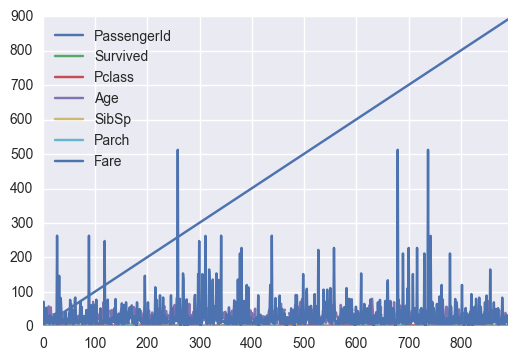

In [3]:
#get an idea of our passengers and plot a graph
print_one_group(titanic_data, 'passengers')
titanic_data.plot()

**Men vs Women**

In [4]:
#creating two df's for men and women separately
male_passengers = titanic_data[titanic_data.Sex == 'male']
female_passengers = titanic_data[titanic_data.Sex == 'female']

two_group_comparison(male_passengers, female_passengers, "men", "women")

There were 577 men and 314 women.
About 109 men survived and 233 women survived.
Which means the survival rate was 0.188908145581 for men and 0.742038216561 for women.


Men had a significantly lower survival rate than women. However, this data doesn't take into account how mothers compared to single men or other variations. I broke down these two groups further to investigate how children would do vs older people. To do this, I set the age of 18 as the boundary. Some of the data didn't include age information so I excluded those 177 passengers and was left with 714 passengers with age data.

In [5]:
#Seeing how many passengers have age data
print "There were {} people under the age of 18 and {} above, total of 714 which leaves 177 passengers with missing age data."\
.format(len(titanic_data[titanic_data.Age<18]), len(titanic_data[titanic_data.Age>=18]))


There were 113 people under the age of 18 and 601 above, total of 714 which leaves 177 passengers with missing age data.


**With Family Vs Without Family**

Next I created one data frame of those with age data. From that group, I made two groups using the SibSp and Parch fields. If a passenger had a zero in both fields, they would be placed in the without family dataframe. If they had at least one, then they'd be placed in the with family group. The purpose of this is to isolate those people who are most likely kids or parents from those that are single aboard The Titanic.

In [6]:
#creating a new df to drop passengers that didn't include age information.
#Age will be important for looking at the next following groups.
#Will compare mothers, fathers, children, single men, single women
titanic_with_age = titanic_data[titanic_data.Age>=0]

#gonna break it up into two groups, ones with family, siblings/spouse children/parents, and those without.
#if a passenger has a combined score of more than or equal to 1 from sbsp and parch, then they will be considered with family.

fam = titanic_with_age[(titanic_with_age.SibSp > 0) | (titanic_with_age.Parch > 0)]
single = titanic_with_age[(titanic_with_age.SibSp == 0) & (titanic_with_age.Parch == 0)]
two_group_comparison(fam, single, 'people with family', 'single passengers')

There were 310 people with family and 404 single passengers.
About 160 people with family survived and 130 single passengers survived.
Which means the survival rate was 0.516129032258 for people with family and 0.321782178218 for single passengers.


**A look at likely fathers, mothers, and children**

Next, we break down the "with family" data set even further to find who's likely a father, mother, or child and look at those survival rates. To do this, I separated those over 18 and assumed they are likely parents, splitting them further in male and female groups for fathers and mothers, respectively. This opens up our data to error and limitations but for the purpose of exploring, we'll continue ahead but not assume any causation or significant take aways.

In [7]:

#to find parents, I broke up the family df into new groups where they're over 18 and male or female respectively.
#children most likely make up the rest of the people under 18.
fathers = fam[(fam.Sex == 'male') & (fam.Age >= 18.0)]
mothers = fam[(fam.Sex == 'female') & (fam.Age >= 18.0)]
children = fam[(fam.Age < 18)]

two_group_comparison(fathers, mothers, "fathers", "mothers")
print""
print_one_group(children, "children")

There were 103 fathers and 117 mothers.
About 20 fathers survived and 89 mothers survived.
Which means the survival rate was 0.194174757282 for fathers and 0.760683760684 for mothers.

There were 90 children.
About 51 children survived.
The survival rate for children was 0.566666666667.


I thought that parent data would be overall much higher than your general male/female but both results are fairly consistent with the overall gender average. The one result that surprised me here is how low children were. I expected them to be closer to the mothers survival rate. Why is it that children are that low compared to mothers? Perhaps the family size or socio-economic status has an effect? We'll look into that later.

**Single men and single women**

Next we'll take a look at men and women without family and see how they compare to people with family. Do people survive more if they're in numbers?

In [8]:
bachelors = single[single.Sex == 'male']
ladies = single[single.Sex == 'female']

two_group_comparison(bachelors, ladies, "bachelors", "ladies")

There were 304 bachelors and 100 ladies.
About 51 bachelors survived and 79 ladies survived.
Which means the survival rate was 0.167763157895 for bachelors and 0.79 for ladies.


Single women had a high survival rate comparable to the overall women's survival rate. Single men also had simlar results. So far all the data seems generally consistent compared to their respective overall rates for their gender. 

If the rate for children is 56% and overall women is 74%, how did young girls do? They should be close to this average just like ladies, and mothers.

In [9]:
girls = children[children.Sex == 'female']
print_one_group(girls, "girls")

There were 44 girls.
About 29 girls survived.
The survival rate for girls was 0.659090909091.


Young girls had the lowest survival rate of all of the female sub groups. Why is that? Is there another factor at play here? Class may have soemthing to do with this and we'll investigate this in the next section.

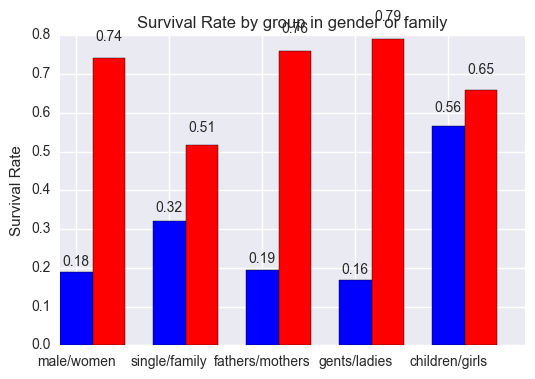

In [10]:
#creating a bar graph to represent some of our data looking at previous groups we've looked at
N = 5 #pair men/women, without/with fam, fathers/mothers, gents/ladies, children/girls
#create a list for all of our different groups to put into the bar graph
groups1 = (male_passengers.Survived.mean(), single.Survived.mean(), fathers.Survived.mean(), bachelors.Survived.mean(),\
             children.Survived.mean())
groups2 = (female_passengers.Survived.mean(), fam.Survived.mean(), mothers.Survived.mean(), ladies.Survived.mean(),\
             girls.Survived.mean())

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, groups1, width, color='b')
rects2 = ax.bar(ind + width, groups2, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by group in gender or family')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('male/women', 'single/family', 'fathers/mothers', 'gents/ladies', 'children/girls'))


def autolabel(rects):
    #Attach a text label above each bar displaying its height
    for rect in rects:
        height = float(rect.get_height())
        heightnum = str(height)
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*(height),
                '%s' % heightnum[:4],
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

**Wrap up on gender, family, age**

Males in general had a very low survival rate across the board. Females were generally high across the board. Boarding the titanic with family had a higher survival rate 51% overall compared to 32% without family. There wasn't a significant difference between fathers and mothers and single men and single women respectively compared to their respective overall gender survival rates. When looking at children, they had an overall survival rating of 56% with young girls at about 65%. This is interesting because young girls had the lowest survival rating out of all the female groups. It's hard to infer what caused this difference but I would think that being both female and a child, young girls should have had the highest survival rating out of the different groups on The Titanic.

**What about class?**

Perhaps the factor that influenced the survival rating of young girls is their class. Next, I broke down our Titanic data in three groups for the three different classes. This field was included in all the passengers so our data is back to being inclusive for all 891 passengers. This may or may not have an impact when comparing survival rates between class and our previous analysis.

In [11]:
first_class = titanic_data[titanic_data.Pclass == 1]
second_class = titanic_data[titanic_data.Pclass == 2]
third_class = titanic_data[titanic_data.Pclass == 3]

print_one_group(first_class, "Upper class passengers")
print""
print_one_group(second_class, "Middle class passengers") 
print""
print_one_group(third_class, "Lower class passengers")

There were 216 Upper class passengers.
About 136 Upper class passengers survived.
The survival rate for Upper class passengers was 0.62962962963.

There were 184 Middle class passengers.
About 87 Middle class passengers survived.
The survival rate for Middle class passengers was 0.472826086957.

There were 491 Lower class passengers.
About 119 Lower class passengers survived.
The survival rate for Lower class passengers was 0.242362525458.


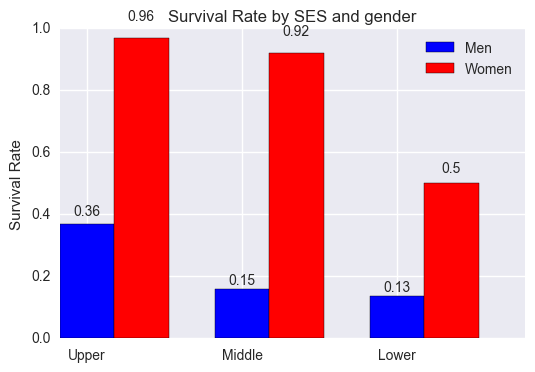

In [12]:
N = 3 #pair Upper, middle, lower
men_survival = (first_class[first_class.Sex == "male"].Survived.mean(), second_class[second_class.Sex == "male"].Survived.mean(), \
           third_class[third_class.Sex == "male"].Survived.mean())
women_survival = (first_class[first_class.Sex == "female"].Survived.mean(), second_class[second_class.Sex == "female"].Survived.mean(), \
           third_class[third_class.Sex == "female"].Survived.mean())

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(ind, men_survival, width, color='b')
rects2 = ax.bar(ind + width, women_survival, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by SES and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Upper', 'Middle', 'Lower'))
ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

autolabel(rects1)
autolabel(rects2)

plt.show()

**Wrap up on class**

Looking at the chart above, the first thing that stands out is that women from first class had an astounding 96% survival rate. When looking at different groups, whether they're mothers, single, children, etc., we hadn't seen a number much higher than 75% so this number is huge. Middle class women also had an incredible survival rating of 92%. Lastly, women from lower class had a surivival rating of 50% which kind of explains why our overall mean for all women is about 74%.

In [13]:
lower_fem = third_class[third_class.Sex == "female"]
lower_girls = lower_fem[lower_fem.Age <= 18]
upper_fem = first_class[first_class.Sex == "female"]
upper_girls = upper_fem[upper_fem.Age <= 18]

two_group_comparison(lower_girls, upper_girls, "girls from low SES", "girls from high SES")

There were 43 girls from low SES and 11 girls from high SES.
About 22 girls from low SES survived and 10 girls from high SES survived.
Which means the survival rate was 0.511627906977 for girls from low SES and 0.909090909091 for girls from high SES.


**Conclusion**

Exploring this data while looking at different characteristics such as age, gender, class, and family gives us a rough idea of the diffferent groups aboard The Titanic. However, since we didn't performed any statistical analysis and weren't explicitly thorough with looking at different groups, there's not much take aways we can do here. We can just look at general observations.

In summary, it seems that class may have had a larger impact at survival chances than your gender, being with family, and age. Being female and from either upper class had the best overall chances of surviving on the Titanic. On the lower end, being male and from lower class had the lowest chance of surviving on the Titanic.

**Spoiler Alert**

These findings seem to be consistent with the movie. Rose was a woman from a wealthy family while Jack was a male laborer who didn't pay for his ticket. If there were 10 couples aboard The Titanic like Rose and Jack, the Rose counterpart would most liklely survive in all 10 example couples while the Jack counterpart would be lucky to survive in one of the couples.



Sources:
    
bar graph foundation - http://matplotlib.org/examples/api/barchart_demo.html

kaggle site for data - https://www.kaggle.com/c/titanic/data
